
# Proyecto AI (primera entrega)
## datos: Hotels TripAdvisor
### Brandon Rambauth
### Nicolas Rojas
### Andres Barbosa

In [176]:
#importamos las librerias a usar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets

# visualizacion de la tabla 

In [177]:
#leemos el documento csv que trae los datos 

pd.read_csv('tripadvisor_hotel_reviews.csv')

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [178]:

#guardar en una variable el archivo o tabla 

hotels=pd.read_csv('tripadvisor_hotel_reviews.csv')

# Datos estadísticos acerca de nuestra informacion
### conteo , promedio ,desviasion ,min ,max y cuartiles

In [179]:
#mostrar datos estadisticos del archivo 

hotels.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


# Datos estadísticos #2
### media , mediana , moda, varianza 

In [180]:
#monstramos datos estadisticos del archivo parte 2

media = hotels["Rating"].mean()
print("la media es")
print(round(media,2))
mediana = hotels["Rating"].median()
print("la mediana es")
print(round(mediana,2))
moda = hotels["Rating"].mode()
print("la moda es")
print(round(moda,2))
var = hotels["Rating"].var()
print("la varianza es")
print(round(var,2))

la media es
3.95
la mediana es
4.0
la moda es
0    5
dtype: int64
la varianza es
1.52


# grafica (histograma) para ver cuantos hoteles tienen calificacion de x estrellas 

<AxesSubplot:ylabel='Frequency'>

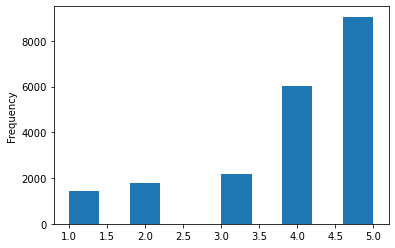

In [181]:
#mostrar cuantos hoteles tienen cada clasificacion 

hotels.Rating.plot.hist()

# grafica (pastel) para ver cuantos hoteles tienen calificacion de x estrellas 

<AxesSubplot:ylabel='Rating'>

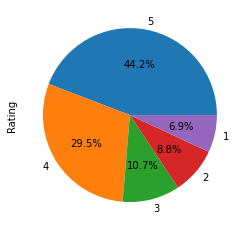

In [182]:
serie=hotels.Rating.value_counts()
serie.plot.pie(autopct='%1.1f%%')  #(20491/100)=(x/44.2)

# entrega 2 - Analisis de sentimiento -

In [183]:
from textblob import TextBlob
import seaborn as sns

In [184]:
tripadvisor_df= pd.read_csv('tripadvisor_hotel_reviews.csv')

In [185]:
tripadvisor_df.head(5)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [186]:
tripadvisor_df['polaridad']=tripadvisor_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity) #(hallar polaridad del texto )

In [187]:
tripadvisor_df['subob']=tripadvisor_df['Review'].apply(lambda x: TextBlob(x).sentiment.subjectivity) #(hallar subjetividad del texto)

In [188]:
print(tripadvisor_df['polaridad'].head())

0    0.208744
1    0.214923
2    0.294420
3    0.504825
4    0.384615
Name: polaridad, dtype: float64


In [189]:
print(tripadvisor_df['subob'].head())

0    0.687000
1    0.495009
2    0.605208
3    0.691228
4    0.629396
Name: subob, dtype: float64


In [190]:
print("polaridad")
print("valor maximo",tripadvisor_df['polaridad'].max())
print("valor minimo",tripadvisor_df['polaridad'].min())
print("media",tripadvisor_df['polaridad'].mean())

polaridad
valor maximo 1.0
valor minimo -1.0
media 0.27427779068137187


C:\Users\bcces\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bcces\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='subob', ylabel='Density'>

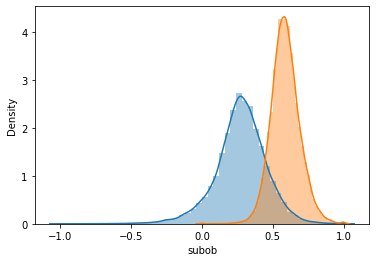

In [191]:
sns.distplot(tripadvisor_df['polaridad'])
sns.distplot(tripadvisor_df['subob'])

In [192]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import pylab as pl
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import Normalize
from time import time

In [193]:
#extraer un label en nuestro caso el Rating 

Rating=tripadvisor_df['Rating']
Rating
tripadvisor_df.drop('Rating',axis=1,inplace=True)

In [194]:
tripadvisor_df

,Review,polaridad,subob
0,nice hotel expensive parking got good deal sta...,0.208744,0.687000
1,ok nothing special charge diamond member hilto...,0.214923,0.495009
2,nice rooms not 4* experience hotel monaco seat...,0.294420,0.605208
3,"unique, great stay, wonderful time hotel monac...",0.504825,0.691228
4,"great stay great stay, went seahawk game aweso...",0.384615,0.629396
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",0.221729,0.508586
20487,great location price view hotel great quick pl...,0.503704,0.622222
20488,"ok just looks nice modern outside, desk staff ...",0.171220,0.524304
20489,hotel theft ruined vacation hotel opened sept ...,0.122573,0.533441


In [195]:
X1=np.array(tripadvisor_df)



In [196]:
#seleccionamos los datos  a usar
X=X1[:,[1,2]]

#tomamos nuestro label 
y=Rating

In [197]:
X
# Dividimos los datos estratificados al 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [198]:
# Parámetros del clasificador
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [199]:
import graphviz
from sklearn.tree import export_graphviz

# intento con vector machine 


In [286]:
np.random.seed(0)

X, y 

(array([[0.20874404761904758, 0.687],
        [0.21492277992277992, 0.49500858000858006],
        [0.29441964285714284, 0.6052083333333333],
        ...,
        [0.17121985157699443, 0.52430426716141],
        [0.12257313393677027, 0.5334408296529507],
        [0.11061507936507936, 0.6261904761904762]], dtype=object),
 0        4
 1        2
 2        3
 3        5
 4        5
         ..
 20486    5
 20487    4
 20488    2
 20489    1
 20490    2
 Name: Rating, Length: 20491, dtype: int64)

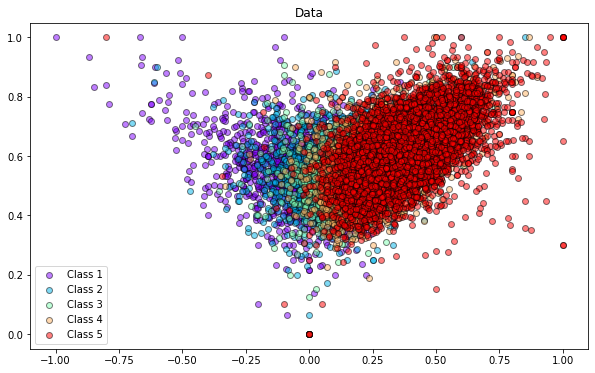

In [287]:
# Dibuje los datos
pl.figure(figsize=(10,6))
plot_data(X, y)

In [288]:
# Importamos el metodo
from sklearn.svm import LinearSVC

# Crear dos clasificadores de kernel lineal
linear_trip = LinearSVC()

# Entrenamos los modelo `LinearSVC` llamando la función `fit()` sobre el conjunto de datos reducido
linear_trip.fit(X_train, y_train)

LinearSVC()

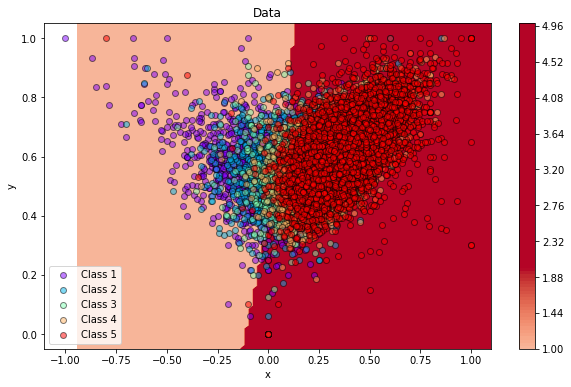

In [289]:
pl.figure(figsize=(10,6))
plot_decision_region(X_test,gen_pred_fun(linear_trip))
plot_data(X_test, y_test)

In [290]:
# Error en entrenamiento para iris
# Error en prueba para iris
print("Error en entrenamiento : {}".format(1-linear_trip.score(X_train,y_train)))
print("Error en prueba: {}".format(1-linear_trip.score(X_test,y_test)))

Error en entrenamiento : 0.5019870320016733
Error en prueba: 0.4975601821730644


# intento con arbol de decision 

In [401]:
from sklearn.tree import DecisionTreeClassifier
# Definición del clasificador
classifier = DecisionTreeClassifier(max_depth=20)

In [402]:
# Entrenamiento
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [403]:
# Función para visualizar un conjunto de datos en 2D
def plot_data(X_train, y_train):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color.reshape(1,-1),
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Función para visualizar de la superficie de decisión de un clasificador
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

def plot_labels(n_folds, n_classes, list_labels):
    ind = np.arange(n_folds)
    width = 0.15
    
    countings = []
    for labels in list_labels:
        labels = np.array(labels)
        countings.append([np.count_nonzero(labels == x) for x in range(n_classes)])
    
    class_bars = []
    for cls in range(n_classes):
        class_bars.append([l[cls] for l in countings])
    
    fig, ax = pl.subplots()
    i = 0
    for class_bar in class_bars:
        ax.bar(ind + width*i, class_bar, width, label='Clase '+str(i))
        i += 1
        
    ax.set_xticks(ind + 2*width / 3)
    ax.set_xticklabels(['Pliegue {}'.format(k) for k in range(n_folds)])
    pl.legend(loc="best")
    pl.title("Etiquetas")

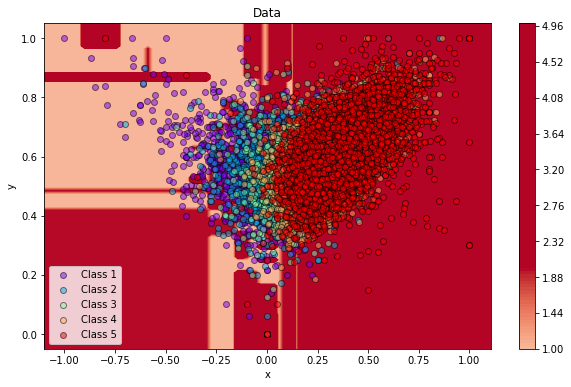

In [404]:
pl.figure(figsize = (10, 6))    
plot_decision_region(X, gen_pred_fun(classifier))
plot_data(X_train, y_train)

In [405]:
# Error de clasificación
print("score con datos de entrenamiento")
print(classifier.score(X_train,y_train))
print("error con datos de entrenamiento")
print(1-classifier.score(X_train,y_train))

score con datos de entrenamiento
0.7918845429826397
error con datos de entrenamiento
0.20811545701736034


## Prueba con datos de testeo


In [406]:
# Función para visualizar un conjunto de datos en 2D
def plot_data(X_test, y_test):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color.reshape(1,-1),
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Función para visualizar de la superficie de decisión de un clasificador
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

def plot_labels(n_folds, n_classes, list_labels):
    ind = np.arange(n_folds)
    width = 0.15
    
    countings = []
    for labels in list_labels:
        labels = np.array(labels)
        countings.append([np.count_nonzero(labels == x) for x in range(n_classes)])
    
    class_bars = []
    for cls in range(n_classes):
        class_bars.append([l[cls] for l in countings])
    
    fig, ax = pl.subplots()
    i = 0
    for class_bar in class_bars:
        ax.bar(ind + width*i, class_bar, width, label='Clase '+str(i))
        i += 1
        
    ax.set_xticks(ind + 2*width / 3)
    ax.set_xticklabels(['Pliegue {}'.format(k) for k in range(n_folds)])
    pl.legend(loc="best")
    pl.title("Etiquetas")

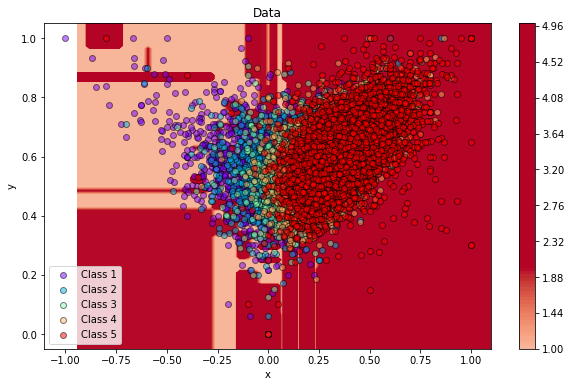

In [407]:
pl.figure(figsize = (10, 6))    
plot_decision_region(X_test, gen_pred_fun(classifier))
plot_data(X_test, y_test)

In [408]:
# Error de clasificación
print("score con datos de testeo ")
print(classifier.score(X_test,y_test))
print("error con datos de testeo ")
print(1-classifier.score(X_test,y_test))

score con datos de testeo 
0.4513662979830839
error con datos de testeo 
0.5486337020169161


# prueba con Ramdom Forest

In [356]:
from sklearn.ensemble import RandomForestClassifier

In [357]:
np.random.seed(0)

In [409]:
rf = RandomForestClassifier(n_estimators=20, max_depth=20)

In [410]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=20)

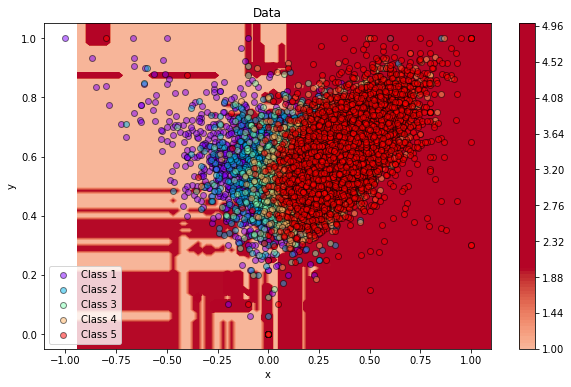

In [411]:
pl.figure(figsize = (10, 6))
plot_decision_region(X_test, gen_pred_fun(rf))
plot_data(X_test, y_test)

In [412]:
print('Error en entrenamiento: {}'.format(1-rf.score(X_train, y_train)))
print('Error en prueba: {}'.format(1-rf.score(X_test, y_test)))

Error en entrenamiento: 0.07648330195914388
Error en prueba: 0.5263500325309043


# kernel Polinomial

In [413]:
# Importamos el metodo
from sklearn.svm import SVC

In [414]:
# Definimos el clasificador con kernel='poly' y degree=2
poly_svm = SVC(kernel='poly', degree=3)

In [ ]:
# Entrenamos los modelo `SVC` llamando la función `fit()` sobre el conjunto de datos reducido
poly_svm.fit(X_train, y_train)

In [ ]:
print("Error en entrenamiento: {}".format(1-poly_svm.score(X_train, y_train)))
print("Error en prueba: {}".format(1-poly_svm.score(X_test, y_test)))

In [ ]:
pl.figure(figsize = (10, 6))    
plot_decision_region(X_test, gen_pred_fun(poly_svm))
plot_data(X_test, y_test)

# con kernel gaussiano 

In [ ]:
# Cargamos el clasificador
rbf_svm = SVC(kernel='rbf', gamma=64)

In [ ]:
# Entrenamos el clasificador
rbf_svm.fit(X_test, y_test)

In [ ]:
pl.figure(figsize = (10, 6))    
plot_decision_region(X_test, gen_pred_fun(rbf_svm))
plot_data(X_test, y_test)

In [226]:
# Error en entrenamiento
# Error en prueba
print("Error en entrenamiento: {}".format(1-rbf_svm.score(X_train, y_train)))
print("Error en prueba: {}".format(1-rbf_svm.score(X_test, y_test)))

Error en entrenamiento: 0.4814195077738269
Error en prueba: 0.47478854912166557


# busqueda de grilla

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid=[i for i in range(-5,7,1)]
param_grid={'C':[2**i for i in grid], 'gamma':[2**i for i in grid]}

In [58]:
print(param_grid['C'])

[0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]


In [59]:
print(param_grid['gamma'])

[0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]


In [60]:
clf=GridSearchCV(SVC(kernel='rbf'),param_grid=param_grid,verbose=2)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] C=0.03125, gamma=0.03125 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... C=0.03125, gamma=0.03125, total=   3.3s
[CV] C=0.03125, gamma=0.03125 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] ......................... C=0.03125, gamma=0.03125, total=   3.2s
[CV] C=0.03125, gamma=0.03125 ........................................
[CV] ......................... C=0.03125, gamma=0.03125, total=   3.1s
[CV] C=0.03125, gamma=0.03125 ........................................
[CV] ......................... C=0.03125, gamma=0.03125, total=   3.1s
[CV] C=0.03125, gamma=0.03125 ........................................
[CV] ......................... C=0.03125, gamma=0.03125, total=   3.2s
[CV] C=0.03125, gamma=0.0625 .........................................
[CV] .......................... C=0.03125, gamma=0.0625, total=   3.1s
[CV] C=0.03125, gamma=0.0625 .........................................
[CV] .......................... C=0.03125, gamma=0.0625, total=   3.3s
[CV] C=0.03125, gamma=0.0625 .........................................
[CV] .......................... C=0.03125, gamma=0.0625, total=   3.3s
[CV] C=0.03125, gamma=0.0625 .........................................
[CV] .

KeyboardInterrupt: 

In [ ]:

cv_results_df=pd.DataFrame(clf.cv_results_)
cv_results_df.head()


In [ ]:
print(len(cv_results_df))
print(len(param_grid['C']))
print(len(param_grid['gamma']))


In [ ]:
scores=clf.cv_results_['mean_test_score'].reshape(len(param_grid['C']),len(param_grid['gamma']))
scores

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92, vmax=1.))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.title('Accuracy en validación')
plt.show()

In [ ]:
cv_results=cv_results_df[['param_C','param_gamma','mean_test_score']]
cv_results.sort_values(by='mean_test_score', ascending=False).head()

In [ ]:
print(clf.best_params_)

In [ ]:
print(clf.best_score_)

In [ ]:
clf.score(X_test,y_test)

# con kernel lineal


In [227]:
# Importamos el metodo
from sklearn.svm import LinearSVC

In [228]:
linear_trip.fit(X_train, y_train)

LinearSVC()

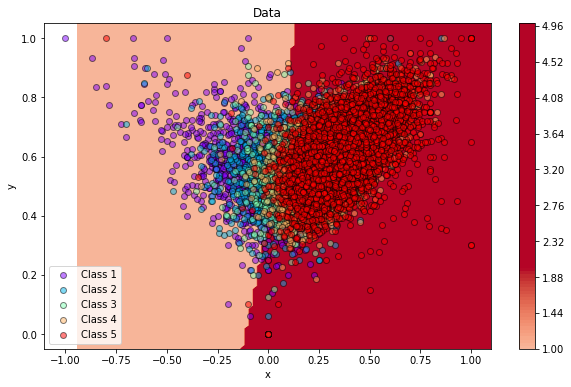

In [229]:
pl.figure(figsize=(10,6))
plot_decision_region(X_test,gen_pred_fun(linear_trip))
plot_data(X_test, y_test)

In [230]:
# Error en entrenamiento para iris
# Error en prueba para iris
print("Error en entrenamiento para trip: {}".format(1-linear_trip.score(X_train,y_train)))
print("Error en prueba para trip: {}".format(1-linear_trip.score(X_test,y_test)))


Error en entrenamiento para trip: 0.5019870320016733
Error en prueba para trip: 0.4975601821730644
